In [ ]:
"""
Credit Risk Prediction with Random Forest

This notebook demonstrates how to build a machine learning model to predict credit risk.
We will use a Random Forest Classifier on the "Credit Risk Dataset" from Kaggle.

"""

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/credit_risk_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
    print("Please make sure you have uploaded the 'credit_risk_dataset.csv' file to your Google Drive and updated the 'file_path' variable.")

if 'df' in locals():
    print("\nDataset Info:")
    df.info()
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Handle missing values
    for col in ['person_emp_length', 'loan_int_rate']:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in '{col}' with median value: {median_val}")

    # Drop rows with any remaining missing values (if any)
    df.dropna(inplace=True)
    print("\nRemaining missing values after handling:")
    print(df.isnull().sum().sum())

    # Define features (X) and target (y)
    X = df.drop('loan_status', axis=1)
    y = df['loan_status']

    # Identify categorical and numerical features
    categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()

    # Remove features that are not useful for prediction or are identifiers
    # 'person_age' and 'person_income' can be useful, so we keep them.
    # We will remove the categorical features from the numerical list.
    numerical_features = [col for col in numerical_features if col not in categorical_features]


    # Step 4: Create Preprocessing Pipelines
    # We create separate pipelines for numerical and categorical features.
    # This ensures that transformations are applied correctly to the right data types.

    # Pipeline for numerical features: scale the data
    numerical_transformer = StandardScaler()

    # Pipeline for categorical features: one-hot encode the data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor object using ColumnTransformer
    # This bundles all the preprocessing steps for different column types.
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Step 5: Split the Data into Training and Testing Sets
    # We split the data to train the model and then test its performance on unseen data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")


    # Step 6: Build and Train the Random Forest Model
    # We will now create a pipeline that includes the preprocessor and the Random Forest classifier.

    # Define the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    # Create the full pipeline
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', rf_model)])

    # Train the model
    print("\nTraining the Random Forest model...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.")


    # Step 7: Make Predictions and Evaluate the Model
    # Now we use the trained model to make predictions on the test set and evaluate its performance.

    # Make predictions
    y_pred = model_pipeline.predict(X_test)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("\n--- Model Evaluation ---")
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Display the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Display the confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Step 8: Feature Importance
    # Let's check which features were most important for the model's predictions.

    # Get feature names after one-hot encoding
    ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)

    # Get feature importances from the trained model
    importances = model_pipeline.named_steps['classifier'].feature_importances_

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()



In [ ]:
!pip install opendatasets

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ss5858
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset


100%|██████████| 368k/368k [00:00<00:00, 632MB/s]



Dataset loaded successfully!
First 5 rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0


/tmp/ipython-input-3-2942170933.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Model training complete.

--- Model Evaluation ---
Accuracy: 0.9342
ROC-AUC Score: 0.9301

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5095
           1       0.98      0.72      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517


Confusion Matrix:


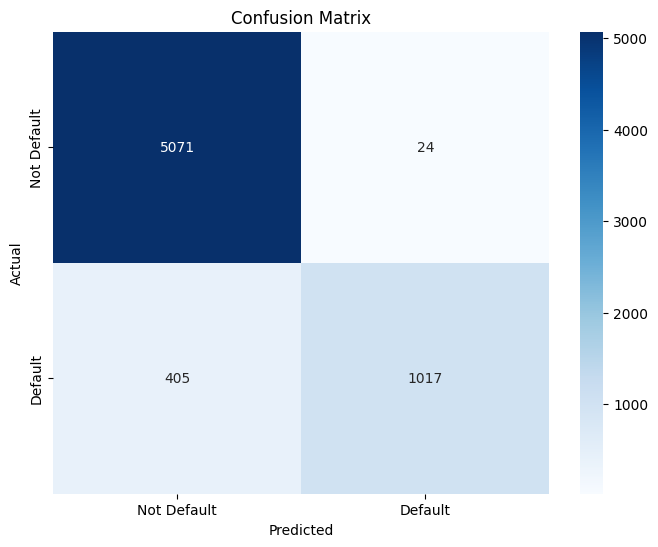

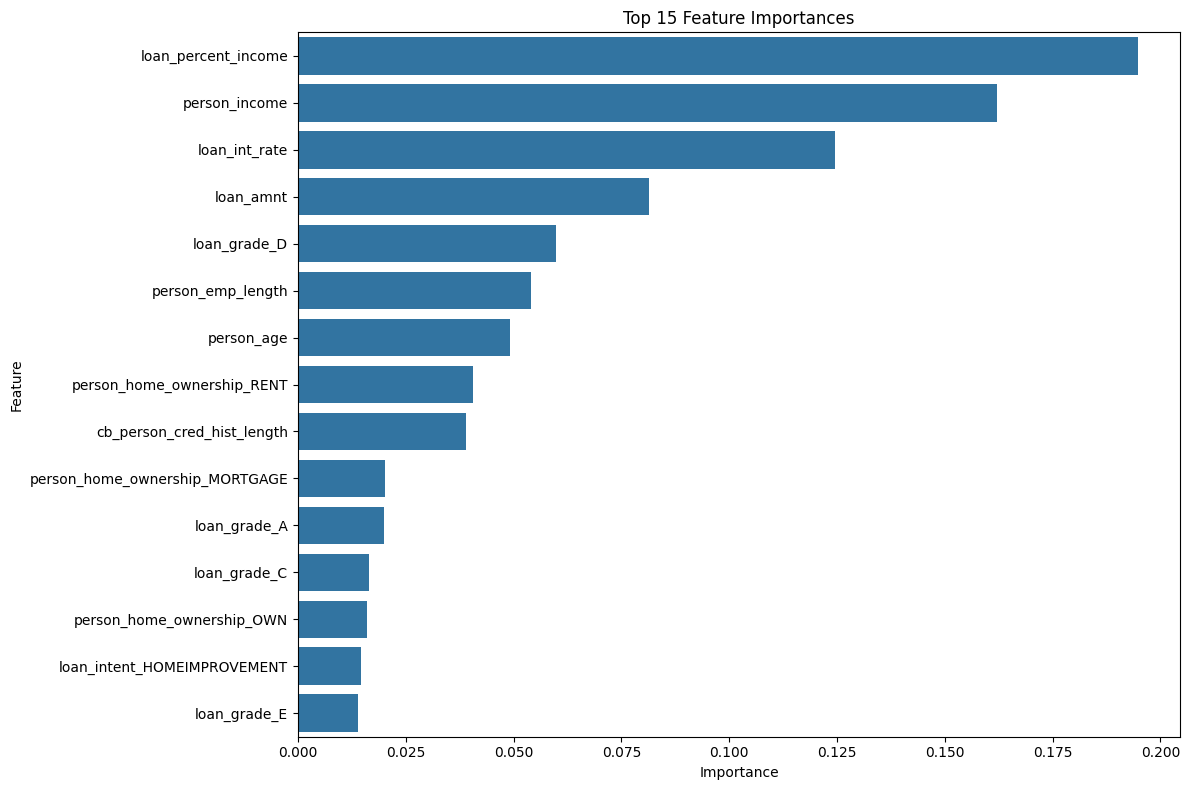

In [ ]:
"""
Credit Risk Prediction with Random Forest

This notebook demonstrates how to build a machine learning model to predict credit risk.
We will use a Random Forest Classifier on the "Credit Risk Dataset" from Kaggle.
"""
# Step 1: Import Necessary Libraries
# We'll start by importing the essential Python libraries for data manipulation,
# machine learning, and visualization.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

# Step 2: Load the Dataset using opendatasets
#
# INSTRUCTIONS FOR THE USER:
# 1. This will download the dataset directly from Kaggle.
# 2. When you run the cell, you will be prompted for your Kaggle username and API key.
# 3. To get your Kaggle API key:
#    a. Go to your Kaggle account page (https://www.kaggle.com/<your-username>/account)
#    b. Click on 'Create New API Token'. This will download a 'kaggle.json' file.
#    c. Open the 'kaggle.json' file. It will contain your username and key.

print("Downloading the dataset from Kaggle...")
od.download('https://www.kaggle.com/datasets/laotse/credit-risk-dataset')

# Provide the path to the downloaded dataset
# opendatasets downloads it into a folder with the dataset's name.
file_path = './credit-risk-dataset/credit_risk_dataset.csv'

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("\nDataset loaded successfully!")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
    print("Please make sure the dataset downloaded correctly into the 'credit-risk-dataset' directory.")


if 'df' in locals():
    # Step 3: Data Exploration and Preprocessing

    # Get a concise summary of the dataframe
    print("\nDataset Info:")
    df.info()

    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Handle missing values
    # For numerical columns with missing values, we will fill them with the median.
    # The median is often a good choice as it is robust to outliers.
    for col in ['person_emp_length', 'loan_int_rate']:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in '{col}' with median value: {median_val}")

    # Drop rows with any remaining missing values (if any)
    df.dropna(inplace=True)
    print("\nRemaining missing values after handling:")
    print(df.isnull().sum().sum())

    # Define features (X) and target (y)
    # The target variable is 'loan_status', which indicates if a loan defaulted (1) or not (0).
    X = df.drop('loan_status', axis=1)
    y = df['loan_status']

    # Identify categorical and numerical features
    categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()

    # Remove features that are not useful for prediction or are identifiers
    # 'person_age' and 'person_income' can be useful, so we keep them.
    # We will remove the categorical features from the numerical list.
    numerical_features = [col for col in numerical_features if col not in categorical_features]


    # Step 4: Create Preprocessing Pipelines
    # We create separate pipelines for numerical and categorical features.
    # This ensures that transformations are applied correctly to the right data types.

    # Pipeline for numerical features: scale the data
    numerical_transformer = StandardScaler()

    # Pipeline for categorical features: one-hot encode the data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor object using ColumnTransformer
    # This bundles all the preprocessing steps for different column types.
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Step 5: Split the Data into Training and Testing Sets
    # We split the data to train the model and then test its performance on unseen data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")


    # Step 6: Build and Train the Random Forest Model
    # We will now create a pipeline that includes the preprocessor and the Random Forest classifier.

    # Define the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    # Create the full pipeline
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', rf_model)])

    # Train the model
    print("\nTraining the Random Forest model...")
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.")


    # Step 7: Make Predictions and Evaluate the Model
    # Now we use the trained model to make predictions on the test set and evaluate its performance.

    # Make predictions
    y_pred = model_pipeline.predict(X_test)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("\n--- Model Evaluation ---")
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Display the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Display the confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Step 8: Feature Importance
    # Let's check which features were most important for the model's predictions.

    # Get feature names after one-hot encoding
    ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)

    # Get feature importances from the trained model
    importances = model_pipeline.named_steps['classifier'].feature_importances_

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
